In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
import sys 
sys.path.append('../.')

from spring_mass.system import DiscreteSpringMassSystem
from spring_mass.controllers import SpringMassConstantController, SpringMassLQRController 

In [29]:
spring_system = DiscreteSpringMassSystem(m=20, k=40, b=3, dt=0.05, method='zoh')
# controller = SpringMassConstantController(0)
controller = SpringMassLQRController(Q=np.eye(2)*10, R=np.eye(1)*0.1, system=spring_system)

x0 = -5
v0 = -1
total_time = 25 
burn_time = 2

state_traj_basic, u_traj_basic, t_traj_basic = spring_system.simulate(x0, v0, total_time, controller)
state_traj_gt, u_traj_gt, t_traj_gt = spring_system.simulate_with_burn_in(x0, v0, total_time, burn_in_time=burn_time, controller=controller)

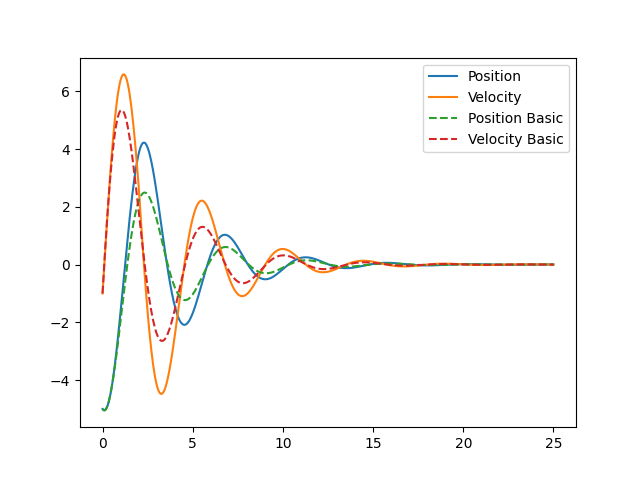

In [30]:
plt.figure()
plt.plot(t_traj_gt, state_traj_gt[:,0], label='Position')
plt.plot(t_traj_gt, state_traj_gt[:,1], label='Velocity')
plt.plot(t_traj_basic, state_traj_basic[:,0], label='Position Basic', linestyle='dashed')
plt.plot(t_traj_basic, state_traj_basic[:,1], label='Velocity Basic', linestyle='dashed')
plt.legend()

In [31]:
plt.close('all')

In [20]:
from spring_mass.controllers import SpringMassDiffusionController

sys.path.insert(0, "../../diffusion-search-learning")


In [27]:
import pickle 

with open("../data/spring_mass/basic_100/metadata.pkl", "rb") as f: 
    metadata = pickle.load(f)

system_params = metadata['system_params']
spring_system = DiscreteSpringMassSystem(m=system_params['m'], 
                                         k=system_params['k'], b=system_params['b'], dt=system_params['dt'], method='zoh')
# controller = SpringMassConstantController(0)
# controller = SpringMassLQRController(Q=np.eye(2)*10, R=np.eye(1)*0.1, system=spring_system)
ckpt_path = "../../diffusion-search-learning/data/outputs/diffusion_experiments/spring_mass/position_based/1_obs/checkpoints/latest.ckpt"
controller = SpringMassDiffusionController(ckpt_path, use_position_only=True)

x0 = -5
v0 = -1
total_time = 25 
burn_time = 2

# state_traj_basic, u_traj_basic, t_traj_basic = spring_system.simulate(x0, v0, total_time, controller)
state_traj, u_traj, t_traj = spring_system.simulate_with_burn_in_diffusion(x0, v0, total_time, burn_in_time=burn_time, controller=controller)

100%|██████████| 500/500 [00:20<00:00, 24.31it/s]


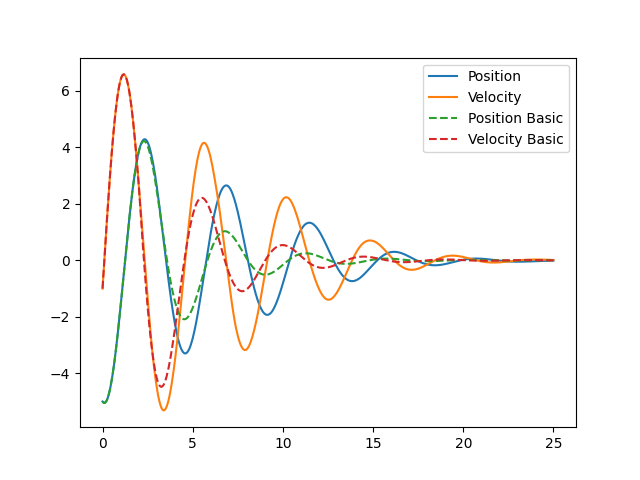

In [32]:
plt.figure()
plt.plot(t_traj, state_traj[:,0], label='Position')
plt.plot(t_traj, state_traj[:,1], label='Velocity')
plt.plot(t_traj_gt, state_traj_gt[:,0], label='Position Basic', linestyle='dashed')
plt.plot(t_traj_gt, state_traj_gt[:,1], label='Velocity Basic', linestyle='dashed')
plt.legend()

In [89]:
np.concat(cc).shape

(6, 1)

In [90]:
cc

[array([[0.59865848],
        [0.15601864]]),
 array([[0.15599452],
        [0.05808361]]),
 array([[0.86617615],
        [0.60111501]])]

In [91]:
np.concat(cc)

array([[0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501]])